<a href="https://colab.research.google.com/github/ValdazoAmerico/kaggle-titanic/blob/main/kaggle_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
training = pd.read_csv('titanic_train.csv')

In [ ]:
test = pd.read_csv('titanic_test.csv')

In [ ]:
import numpy as np

In [ ]:
training['train_test'] = 1
test['train_test'] = 0
test['survived'] = np.NaN
all_data = pd.concat([training,test])

%matplotlib inline
all_data.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'survived', 'train_test'],
      dtype='object')

In [ ]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
 15  train_test    850 non-null    int64  
dtypes: float64(3), int64(6), object(7)
memory usage: 106.4+ KB


In [ ]:
training.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,train_test
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0,1
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0,1
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0,1


In [ ]:
df_num = training[['age', 'sibsp', 'parch', 'fare']]
df_cat = training[['survived', 'pclass', 'sex', 'ticket', 'cabin', 'embarked']]

In [ ]:
import matplotlib.pyplot as plt


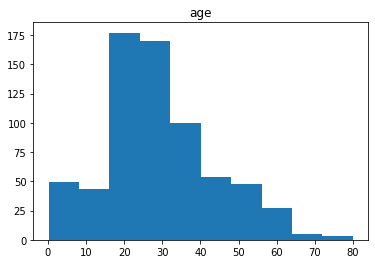

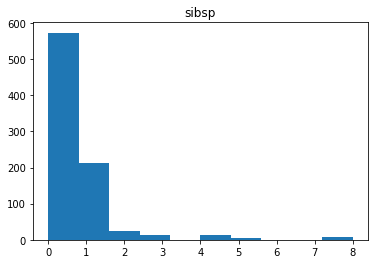

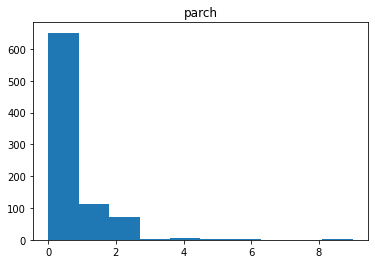

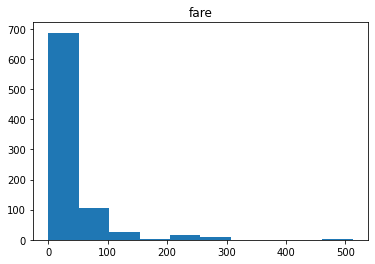

In [ ]:
for i in df_num.columns:
  plt.hist(df_num[i])
  plt.title(i)
  plt.show()

In [ ]:
print(df_num.corr())

            age     sibsp     parch      fare
age    1.000000 -0.251310 -0.159216  0.194609
sibsp -0.251310  1.000000  0.389236  0.141797
parch -0.159216  0.389236  1.000000  0.246414
fare   0.194609  0.141797  0.246414  1.000000


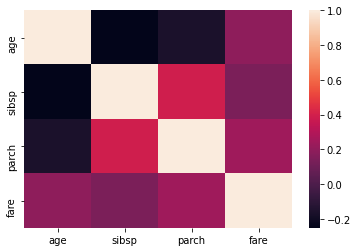

In [ ]:
import seaborn as sns
sns.heatmap(df_num.corr())

In [ ]:
pd.pivot_table(training, index = 'survived', values = ['age', 'sibsp', 'parch', 'fare'])

,age,fare,parch,sibsp
survived,,,,
0,30.020122,23.707454,0.342644,0.560521
1,28.748747,51.660025,0.450479,0.456869


In [ ]:
df_cat

,survived,pclass,sex,ticket,cabin,embarked
0,1,3,female,335432,NaN,Q
1,0,3,male,315089,NaN,S
2,0,3,female,345773,NaN,S
3,1,2,female,29105,NaN,S
4,0,2,male,28221,NaN,S
...,...,...,...,...,...,...
845,0,1,male,680,C39,S
846,0,1,male,11771,B37,C
847,1,2,female,244367,NaN,S
848,0,3,female,SOTON/O.Q. 3101315,NaN,S


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


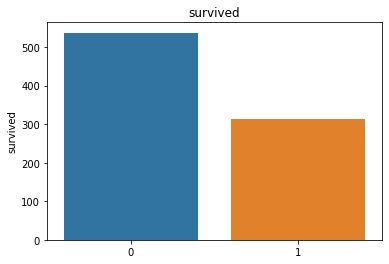

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


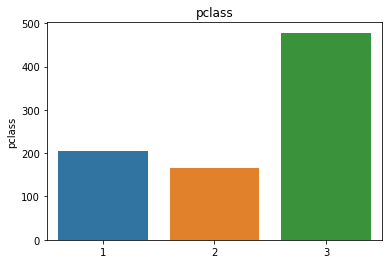

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


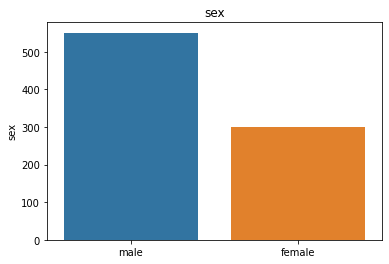

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


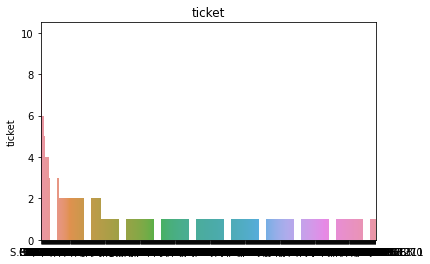

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


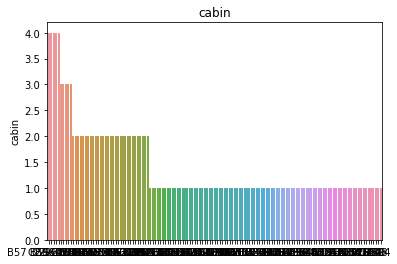

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


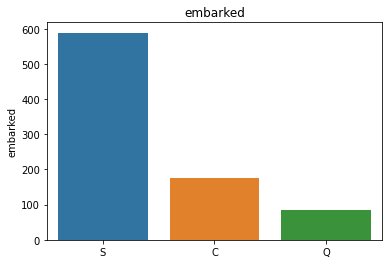

In [ ]:
for i in df_cat.columns:
  sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
  plt.show()\

In [ ]:
print(pd.pivot_table(training, index = 'survived', columns = 'pclass', values='ticket', aggfunc='count'))
print()
print(pd.pivot_table(training, index = 'survived', columns='sex',values='ticket', aggfunc='count'))
print()
print(pd.pivot_table(training, index='survived', columns='embarked', values='ticket', aggfunc='count'))

pclass      1   2    3
survived              
0          81  90  366
1         125  76  112

sex       female  male
survived              
0             89   448
1            210   103

embarked   C   Q    S
survived             
0         85  55  397
1         91  29  192


In [ ]:
df_cat.cabin

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
845    C39
846    B37
847    NaN
848    NaN
849    NaN
Name: cabin, Length: 850, dtype: object

In [ ]:
#Creamos una columna con la cantidad de cabinas de cada pasajero con una función lambda
training['cabin_multiple'] = training.cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

In [ ]:
training['cabin_multiple'].value_counts()

0    659
1    161
2     20
3      6
4      4
Name: cabin_multiple, dtype: int64

In [ ]:
#Los que NO tenian cabina, o cabina chica tenian mas posibilidades de morir
pd.pivot_table(training, index = 'survived', columns='cabin_multiple', values = 'ticket', aggfunc='count')

cabin_multiple,0,1,2,3,4
survived,,,,,
0,473.0,53.0,10.0,1.0,NaN
1,186.0,108.0,10.0,5.0,4.0


In [ ]:
training.ticket.value_counts()

CA. 2343            10
1601                 8
S.O.C. 14879         6
PC 17608             6
347082               6
                    ..
250643               1
A/5 2466             1
19972                1
STON/O2. 3101270     1
330877               1
Name: ticket, Length: 660, dtype: int64

In [ ]:
training['numeric_ticket'] = training.ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['ticket_letters'] = training.ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [ ]:
training['numeric_ticket'].value_counts()

1    625
0    225
Name: numeric_ticket, dtype: int64

In [ ]:
training['ticket_letters'].value_counts()

0            628
pc            58
ca            48
a5            23
sotonoq       14
stono2        13
scparis       11
wc            10
soc            7
c              6
fcc            6
a4             4
wep            3
pp             3
sotono2        2
sca4           2
ppp            1
fc             1
stonoq         1
casoton        1
sopp           1
scah           1
aq4            1
sp             1
aq3            1
a2             1
scahbasle      1
sca3           1
Name: ticket_letters, dtype: int64

In [ ]:
pd.pivot_table(training,index='survived', columns='numeric_ticket', values='ticket', aggfunc='count')

numeric_ticket,0,1
survived,,
0,143,394
1,82,231


In [ ]:
training.name.head(50)

0                                    Smyth, Miss. Julia
1                                       Cacic, Mr. Luka
2     Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...
3                 Hocking, Mrs. Elizabeth (Eliza Needs)
4                                       Veal, Mr. James
5                              Olsen, Mr. Henry Margido
6                       Johnson, Mr. William Cahoone Jr
7                                 Sinkkonen, Miss. Anna
8                                    Ohman, Miss. Velin
9                              Jussila, Miss. Mari Aina
10                            Widener, Mr. Harry Elkins
11      Bucknell, Mrs. William Robert (Emma Eliza Ward)
12        Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
13                        Hocking, Miss. Ellen "Nellie"
14                          Abbott, Mr. Rossmore Edward
15                              Jensen, Mr. Niels Peder
16                            Maybery, Mr. Frank Hubert
17                                   McCoy, Mr. 

In [ ]:
training['name_title'] = training.name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [ ]:
training['name_title'].value_counts()

Mr              488
Miss            171
Mrs             123
Master           46
Dr                6
Rev               4
Col               3
Major             2
the Countess      1
Ms                1
Sir               1
Capt              1
Mme               1
Jonkheer          1
Mlle              1
Name: name_title, dtype: int64

(849,)

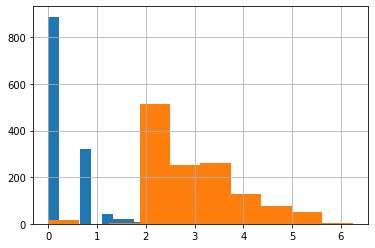

In [ ]:
#create all categorical variables that we did above for both training and test sets 
all_data['cabin_multiple'] = all_data.cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#impute nulls for continuous data 
#all_data.Age = all_data.Age.fillna(training.Age.mean())
all_data.age = all_data.age.fillna(training.age.median())
#all_data.Fare = all_data.Fare.fillna(training.Fare.mean())
all_data.fare = all_data.fare.fillna(training.fare.median())

#drop null 'embarked' rows. Only 2 instances of this in training and 0 in test 
all_data.dropna(subset=['embarked'],inplace = True)

#tried log norm of sibsp (not used)
all_data['norm_sibsp'] = np.log(all_data.sibsp+1)
all_data['norm_sibsp'].hist()

# log norm of fare (used)
all_data['norm_fare'] = np.log(all_data.fare+1)
all_data['norm_fare'].hist()

# converted fare to category for pd.get_dummies()
all_data.pclass = all_data.pclass.astype(str)

#created dummy variables from categories (also can use OneHotEncoder)
all_dummies = pd.get_dummies(all_data[['pclass','sex','age','sibsp','parch','norm_fare','embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])

#Split to train test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)


y_train = all_data[all_data.train_test==1].survived
y_train.shape

In [ ]:
# Scale data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['age','sibsp','parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['age','sibsp','parch','norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].survived

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
#I usually use Naive Bayes as a baseline for my classification tasks 
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75294118 0.38235294 0.66470588 0.68823529 0.80473373]
0.6585938043856596


In [ ]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.77647059 0.80588235 0.78823529 0.77647059 0.88757396]
0.8069265576052906


In [ ]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8        0.78235294 0.72352941 0.72941176 0.75739645]
0.7585381134702402


In [ ]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79411765 0.78823529 0.72352941 0.72352941 0.75739645]
0.7573616428820048


In [ ]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.77647059 0.80588235 0.71764706 0.79411765 0.77514793]
0.7738531152105812


In [ ]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8        0.83529412 0.78823529 0.80588235 0.82248521]
0.8103793943612949


In [ ]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81764706 0.81176471 0.77647059 0.78235294 0.85798817]
0.809244691959624


In [ ]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81764706 0.82941176 0.77647059 0.78235294 0.85798817]
0.8127741037243299


In [ ]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81764706 0.81764706 0.82352941 0.78235294 0.83431953]
0.8150991994430908


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81764706 0.82352941 0.81176471 0.78235294 0.84615385]
0.816289592760181


In [ ]:
#Voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote. For this, you generally want odd numbers
#A "soft" classifier averages the confidence of each of the models. If a the average confidence is > 50% that it is a 1 it will be counted as such
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 

In [ ]:
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8        0.80588235 0.78235294 0.8        0.86390533]
0.8104281239122869


In [ ]:
voting_clf.fit(X_train_scaled,y_train)
y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)
basic_submission = {'passengerId': test.passenger_id, 'survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv', index=False)

In [ ]:
test = test[0:458]

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  459 non-null    int64  
 1   pclass        459 non-null    int64  
 2   name          459 non-null    object 
 3   sex           459 non-null    object 
 4   age           370 non-null    float64
 5   sibsp         459 non-null    int64  
 6   parch         459 non-null    int64  
 7   ticket        459 non-null    object 
 8   fare          459 non-null    float64
 9   cabin         104 non-null    object 
 10  embarked      458 non-null    object 
 11  boat          178 non-null    object 
 12  body          48 non-null     float64
 13  home.dest     281 non-null    object 
 14  train_test    459 non-null    int64  
 15  survived      0 non-null      float64
dtypes: float64(4), int64(5), object(7)
memory usage: 57.5+ KB


In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [ ]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Logistic Regression
Best Score: 0.8163104768534633
Best Parameters: {'C': 0.23357214690901212, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scaled,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    3.0s


KNN
Best Score: 0.8221719457013574
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    3.2s finished
